# Exemplos Avançados

In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram


In [2]:
### Montagem do circuito GHZ de n_qubits
n_qubits=4
q = QuantumRegister(n_qubits)
c = ClassicalRegister(n_qubits)
circuito = QuantumCircuit(q, c)
circuito.h(q[0])
for i in range(n_qubits-1):
    circuito.cx(q[i], q[i+1])
    
circuito.barrier(q)
circuito.measure(q, c)

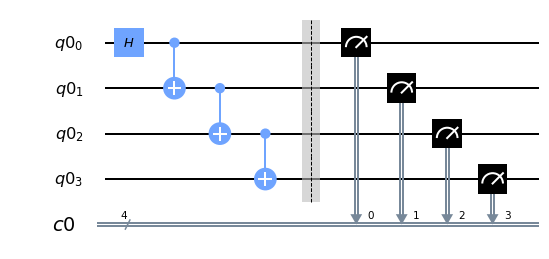

In [3]:
%matplotlib inline
circuito.draw(output='mpl')
# circuito.draw(output='latex')  # segunda opção para visualizar o circuito
# print(circuito)  # terceira opção para visualizar o circuito

In [4]:
## comando para gerar o código QASM do circuito
# print(circuito.qasm())

In [14]:
### Comandos para simular a saída do circuito
simulador = BasicAer.get_backend('qasm_simulator')
job1 = execute(circuito, simulador, shots=8024)
resultado1 = job1.result()
contagem1 = resultado1.get_counts()
print(contagem1)

{'1111': 3982, '0000': 4042}


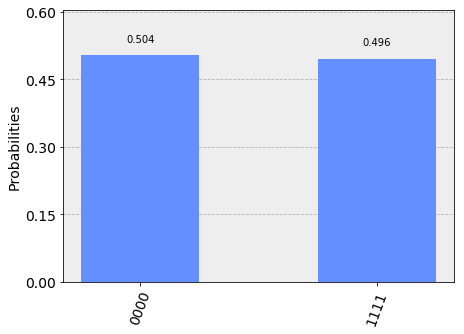

In [15]:
plot_histogram(contagem1)

In [7]:

### Este comando deve ser usado uma única vez, pois o valor do token ficará gravado so seu laptop.
### Vá na página do IBM Q Experience, clique no seu usuário (boneco) para entrar na sua conta. 
### Clique em advanced. Copie o API Token e cole no comando abaixo.
#IBMQ.save_account('API_token')

In [8]:
### Este comando só vai funcionar se você conseguiu ter sucesso no comando anterior.
### Este comando deve ser dado toda vez que abrir este notebook
provedor = IBMQ.load_account()

In [9]:
provedor.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [10]:
### O comando get_backend seleciona o backend
### O comando execute executa o circuito no IBMQX2
### O job entra na fila. A espera pode demorar MUITAS HORAS.
### O comando job_monitor mostra a posição em tempo real.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmq_vigo')
job2 = execute(circuito, maquina, shots=1024)
job_monitor(job2)
resultado2 = job2.result()
contagem2 = resultado2.get_counts()
print(contagem2)

Job Status: job has successfully run
{'0101': 3, '1000': 11, '1110': 15, '1100': 9, '0111': 14, '0100': 8, '1010': 2, '1111': 366, '0110': 4, '1001': 3, '0001': 6, '0000': 555, '0011': 3, '0010': 2, '1101': 12, '1011': 11}


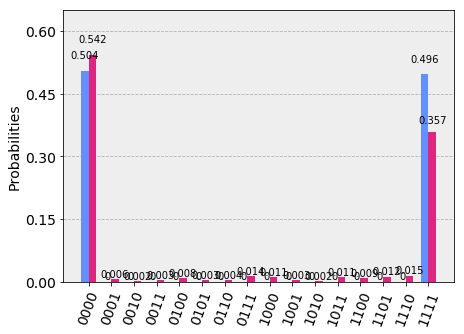

In [16]:
plot_histogram([contagem1,contagem2])

In [12]:
### Este comando executa o circuito no IBMQX4
### O job entra na fila (a posição é mostrada em tempo real). 
### A espera pode demorar muitas horas.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmq_ourense')
job3 = execute(circuito, maquina, shots=1024)
job_monitor(job3)
resultado3 = job3.result()
contagem3 = resultado3.get_counts()
contagem3

Job Status: job has successfully run


{'0101': 5,
 '1000': 16,
 '1110': 48,
 '1100': 5,
 '0111': 25,
 '0100': 1,
 '1010': 10,
 '1111': 383,
 '0110': 7,
 '1001': 3,
 '0001': 16,
 '0000': 428,
 '0011': 16,
 '0010': 20,
 '1101': 16,
 '1011': 25}

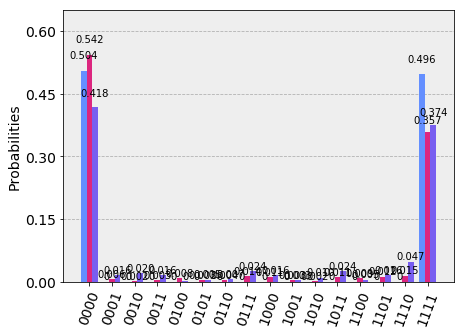

In [17]:
plot_histogram([contagem1,contagem2,contagem3])